In [1]:
import os

import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt

import appletree as apt
from appletree.components import AC
from appletree import Parameter
from appletree.share import PARPATH, DATAPATH

In [2]:
par_manager = Parameter(os.path.join(PARPATH, 'apt_sr0_er.json'))
par_manager.sample_init()
parameters = par_manager.get_all_parameter()

In [3]:
data = pd.read_csv(os.path.join(DATAPATH, 'data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv'))
bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[1e2, 1e4],
    which_np=jnp
)

In [4]:
ac = AC(bins=[bins_cs1, bins_cs2], bins_type='irreg')

In [5]:
ac.deduce()

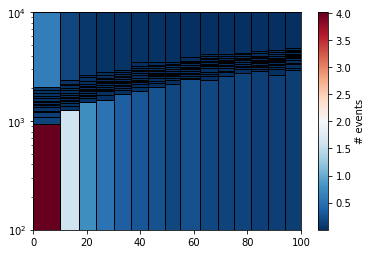

In [6]:
h = ac.simulate_hist(parameters)

apt.plot_irreg_histogram_2d(*ac.bins, h)
plt.yscale('log')
plt.show()